### Labeling a pie and a donut

#### pie

We can provide a function to the autopct argument, which will expand automatic percentage labeling by showing absolute values; we calculate the latter back from relative data and the known sum of all values.

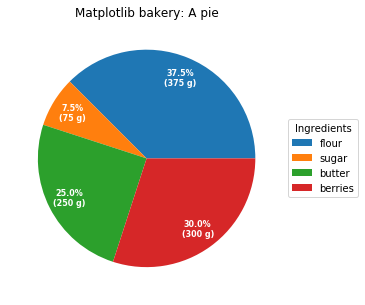

In [68]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"), pctdistance=0.8)

ax.legend(wedges,ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
#formating the pie chart labels
plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [43]:
texts

[Text(0.42095177560159885, 1.0162674857624154, ''),
 Text(-0.9379041861706844, 0.5747484124062514, ''),
 Text(-0.9801071672559598, -0.49938956806635265, ''),
 Text(0.6465638275138399, -0.8899186574910393, '')]

In [44]:
autotexts

[Text(0.22961005941905388, 0.5543277195067721, '37.5%\n(375 g)'),
 Text(-0.511584101547646, 0.3134991340397734, '7.5%\n(75 g)'),
 Text(-0.5346039094123416, -0.27239430985437413, '25.0%\n(250 g)'),
 Text(0.3526711786439127, -0.48541017681329407, '30.0%\n(300 g)')]

#### donut

donut is a pie, having a certain width set to the wedges, which is different from its radius. It's as easy as it gets. This is done via the wedgeprops argument.

1. calculate the angle of the wedge's center,
2. from that obtain the coordinates of the point at that angle on the circumference,
3. determine the horizontal alignment of the text, depending on which side of the circle the point lies,
4 .update the connection style with the obtained angle to have the annotation arrow point outwards from the donut,
5. finally, create the annotation with all the previously determined parameters.

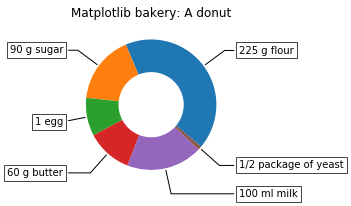

In [37]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()